# Problem 3: Emergence of the 3-core

## a) Analytical calculation

In this section we numerically integrate the system of the five $d={0,1,2,3,4}$ analytical equations:

$$
\frac{d}{dt}((1-t) p_d) = - \frac{\chi_d p_d}{\bar \chi} + \frac{\overline{d \chi}}{\bar \chi} \left( -\frac{dp_d}{c} + \frac{(d+1)p_{d+1}}{c} \right)
$$

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from networks_sup import *
from scipy.integrate import odeint


def find_nearest(array, tol):
    for i in range(len(array)-1):
        if np.sum(array[i+1]) < tol:
            return i
    return -1
    
def f(p, t):
     p0 = p[0]
     p1 = p[1]
     p2 = p[2]
     p3 = p[3]
     p4 = p[4]
     
     bar = p0 + p1 + p2
     dbar = p1 + 2*p2
     c = p1 + 2*p2 + 3*p3 + 4*p4
     
     f0 = (p0 - p0/bar + dbar/bar/c * p1) / (1-t)
     f1 = (p1 - p1/bar + dbar/bar/c * (-p1 + 2*p2)) / (1-t)
     f2 = (p2 - p2/bar + dbar/bar/c * (-2*p2 + 3*p3)) / (1-t)
     f3 = (p3 + dbar/bar/c * (-3*p3 + 4*p4)) / (1-t)
     f4 = (p4 + dbar/bar/c * (-4*p4)) / (1-t)
     
     return [f0, f1, f2, f3, f4]


empirical_all = np.load("sizes_1000_2.npy")
empirical = np.mean(empirical_all, 1)

empirical_all = np.load("sizes_700_5.npy")
empirical2 = np.mean(empirical_all, 1)

# number of probability points
num = 201

pis = np.linspace(0, 1, num)
pis2 = np.linspace(0, 1, len(empirical))
pis3 = np.linspace(0, 1, len(empirical2))

core = np.zeros(num)

t  = np.linspace(0, 1, 1000)

for i in range(len(pis)-1):
    pi = pis[i]
    y0 = [0, 1-pi, 0, 0, pi]
    
    soln = odeint(f, y0, t)
    p0 = soln[:, 0]
    p1 = soln[:, 1]
    p2 = soln[:, 2]
    p3 = soln[:, 3]
    p4 = soln[:, 4]
    
    nearest = find_nearest(p0+p1+p2, 0.00000001)
    
    if nearest > -1:
        core[i] = (999-nearest)/999

        
core[-1] = 1
np.save("integrated_3_core.npy", core)
print()

for i in range(len(core)):
    if core[i] > 0:
        print("Pi at transition:")
        print(i / (num-1))
        print()
        print("Fraction of the 3-core at the transition:")
        print(core[i])
        break

/home/joo/.local/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)



Pi at transition:
0.67

Fraction of the 3-core at the transition:
0.528528528529


## b) Numerical results for specific graph instances

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networks_sup import *
import sys

sys.setrecursionlimit(5000)

ana = np.load("integrated_3_core.npy")
ps2 = np.linspace(0,1, len(ana))



# size of graph
N = 100 # has to be >= 5

times = 1 # runs per given pi

num = 51
ps = np.linspace(0,1, num)
sizes = []

q = 3

for pi in ps:
    size = []
    for real in range(times):
        graph = generate(N, pi)
        new = q_core(graph, q)
        new_values = list(new.graph_dict.values())
        core_count = 0
        for j in new_values:
            if len(j) > 0:
                core_count += 1
        size.append(core_count)
    sizes.append(size)
    
sizes = np.asarray(sizes) / N


### Comparison

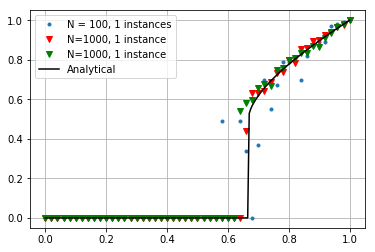

In [49]:

ana = np.load("integrated_3_core.npy")
ps2 = np.linspace(0,1, len(ana))

empirical_all = np.load("sizes_1000_2.npy")
empirical = np.mean(empirical_all, 1)


pis2 = np.linspace(0, 1, len(empirical))


plt.figure()

label = "N = " + str(N) + ", " + str(times) + " instances"
plt.plot(ps, np.mean(sizes, 1), '.', label=label)

#plt.plot(pis2, empirical, 'rv', label="N=1000, 2 instances")
plt.plot(pis2, empirical_all[:,1], 'rv', label="N=1000, 1 instance")
plt.plot(pis2, empirical_all[:,0], 'gv', label="N=1000, 1 instance")

plt.plot(ps2, ana, 'k-', label="Analytical")
plt.grid()
plt.legend()
plt.show()